In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
base_dir = "archive"
image_size = 224

## Creating DataGenerator

In [3]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0,
                                                            shear_range = 0.2,
                                                            zoom_range = 0.2,
                                                            width_shift_range = 0.2,
                                                            height_shift_range = 0.2,
                                                            fill_mode="nearest")
batch_size = 32
train_data = train_datagen.flow_from_directory(os.path.join(base_dir,"train"),
                                               target_size=(image_size,image_size),
                                               batch_size=batch_size,
                                               class_mode="categorical"                                               
                                              )

Found 140590 images belonging to 38 classes.


In [4]:
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1/255.0)
test_data = test_datagen.flow_from_directory(os.path.join(base_dir,"valid"),
                                               target_size=(image_size,image_size),
                                               batch_size=batch_size,
                                               class_mode="categorical"                                               
                                              )

Found 35144 images belonging to 38 classes.


In [5]:
categories = list(train_data.class_indices.keys())
print(categories)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [6]:
train_data.image_shape

(224, 224, 3)

## Using MobileNet

In [7]:
base_model = keras.applications.MobileNet(weights="imagenet",include_top=False,input_shape=(image_size,image_size,3))

In [8]:

base_model.trainable = False
inputs = keras.Input(shape=(image_size,image_size,3))
x = base_model(inputs,training=False)
x = keras.layers.GlobalAveragePooling2D()(x)
x = keras.layers.Dropout(0.2)(x)
x = keras.layers.Dense(len(categories),activation="softmax")(x)#adding fc layer
model = keras.Model(inputs=inputs, outputs=x, name="LeafDisease_MobileNet")

In [9]:
model.summary()

Model: "LeafDisease_MobileNet"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d (G  (None, 1024)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense (Dense)               (None, 38)                38950     
                                                                 
Total params: 3,267,814
Trainable params: 38,

In [10]:

optimizer = keras.optimizers.Adam()
model.compile(optimizer=optimizer,loss=keras.losses.CategoricalCrossentropy(from_logits=True),metrics=[keras.metrics.CategoricalAccuracy()])

In [11]:
history = model.fit_generator(train_data,
          validation_data=test_data,
          epochs=35,
          steps_per_epoch=150,
          validation_steps=100
         )

C:\Users\Ambika\AppData\Local\Temp/ipykernel_9892/361906534.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_data,


Epoch 1/35


C:\Users\Ambika\anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


150/150 [==============================] - 338s 2s/step - loss: 1.9822 - categorical_accuracy: 0.4856 - val_loss: 0.8122 - val_categorical_accuracy: 0.8006
Epoch 2/35
150/150 [==============================] - 295s 2s/step - loss: 0.7781 - categorical_accuracy: 0.7842 - val_loss: 0.5217 - val_categorical_accuracy: 0.8612
Epoch 3/35
150/150 [==============================] - 281s 2s/step - loss: 0.5726 - categorical_accuracy: 0.8369 - val_loss: 0.4241 - val_categorical_accuracy: 0.8788
Epoch 4/35
150/150 [==============================] - 287s 2s/step - loss: 0.4725 - categorical_accuracy: 0.8571 - val_loss: 0.3148 - val_categorical_accuracy: 0.9122
Epoch 5/35
150/150 [==============================] - 293s 2s/step - loss: 0.4127 - categorical_accuracy: 0.8765 - val_loss: 0.2816 - val_categorical_accuracy: 0.9175
Epoch 6/35
150/150 [==============================] - 311s 2s/step - loss: 0.3666 - categorical_accuracy: 0.8925 - val_loss: 0.2592 - val_categorical_accuracy: 0.9237
Epoch 7/3

In [12]:
model.evaluate(test_data)

1099/1099 [==============================] - 1128s 1s/step - loss: 0.1365 - categorical_accuracy: 0.9528


[0.13653682172298431, 0.9528226852416992]

In [13]:
model.save('leaf-cnn1.h5')

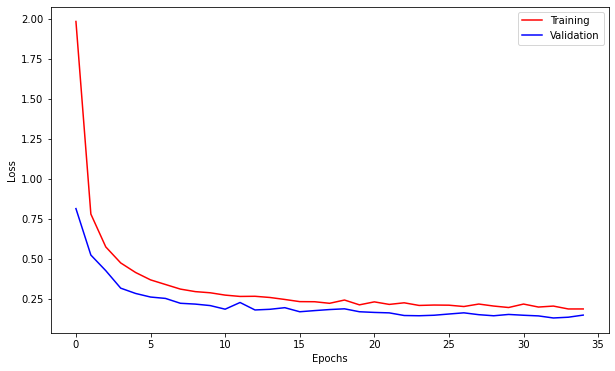

In [14]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,loss,c="red",label="Training")
plt.plot(epochs,val_loss,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

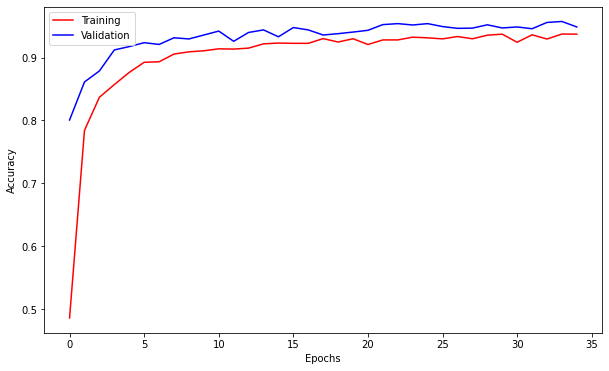

In [15]:
acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']

epochs = range(len(acc))

fig = plt.figure(figsize=(10,6))
plt.plot(epochs,acc,c="red",label="Training")
plt.plot(epochs,val_acc,c="blue",label="Validation")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()